## 2D FFT 


The following steps can be used to compute a 2D FFT in MATLAB:

1. Take a 2D signal matrix
2. In the case of Radar signal processing. Convert the signal in MxN matrix, where M is the size of Range FFT samples and N is the size of Doppler FFT samples: 

* `signal  = reshape(signal, [M, N])` 

3. Run the 2D FFT across both the dimensions. 
* `signal_fft = fft2(signal, M, N)`   

Y = fft2(X) returns the 2D FFT of a matrix using a fast Fourier transform algorithm, which is equivalent to computing fft(fft(X).').'. If X is a multidimensional array, then fft2 takes the 2-D transform of each dimension higher than 2. The output Y is the same size as X. Y = fft2(X,M,N) truncates X or pads X with trailing zeros to form an m-by-n matrix before computing the transform. Y is m-by-n. If X is a multidimensional array, then fft2 shapes the first two dimensions of X according to m and n.

4. Shift zero-frequency terms to the center of the array 
* `signal_fft = fftshift(signal_fft);` 

5. Take the absolute value 
* `signal_fft = abs(signal_fft);` 

6. Here since it is a 2D output, it can be plotted as an image. Hence, we use the imagesc function 

* `imagesc(signal_fft);`

#### 2D FFT Exercise

In the following exercise, you will practice the 2D FFT in MATLAB using some generated data. For this exercise, we are going to use the same data that we used in the 1D FFT exercise. However, the generated signal X(t) was 1D. In this exercise, we will reshape it to 2D for demonstrating the 2D FFT technique.

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
# === Part 1: 1D FFT ===

# Signal parameters
Fs = 1000;            # Sampling frequency                    
T = 1/Fs;             # Sampling period       
L = 1500;             # Length of signal
t = np.array([l*T for l in range(L)])      # Time vector

In [11]:
# Create signal with 50 Hz and 120 Hz sinusoids
s = 0.7 * np.sin(2 * np.pi * 50 * t)+np.sin(2 * np.pi * 120 * t)

In [12]:
# Add zero-mean Gaussian noise with std dev = 2 (variance = 4)
x = s+2*np.random.randn(L)

Text(0, 0.5, 'x(t)')

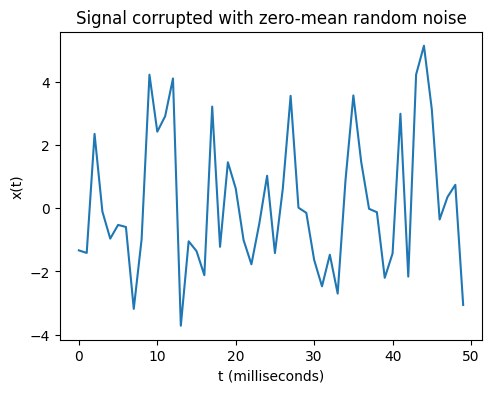

In [16]:
# Plot noisy time-domain signal 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(1000 * t[:50], x[:50]) # Just plot 50 points to visualize
plt.title("Signal corrupted with zero-mean random noise")
plt.xlabel("t (milliseconds)")
plt.ylabel("x(t)")


In [18]:
# Compute FFT 
Y = np.fft.fft(x)

# Compute two-sided and then single-sided spectrum 
P2 = np.abs(Y/L)
P1 = P2[:L//2 +1] 
P1[1:-1] *= 2 # Double non-DC/Nquist components 

# Frequency axis 
f = Fs* np.arange(0,L//2+1)/L

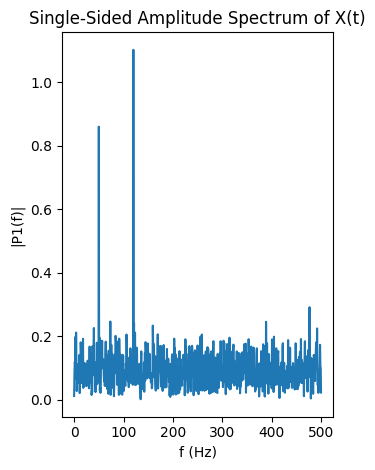

In [19]:
# Plot single-sided amplitude spectrum 
plt.subplot(1,2,2)
plt.plot(f, P1)
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.tight_layout()
plt.show()

In [24]:
# === Part 2: 2D FFT ===

# Reshape 1D signal into 2D Matrix 
M = int(L/50) # 30 rows 
N = int(L/30) # 50 columns 

x_2d = np.reshape(x, (M,N)) #shape:(30,50)


In [22]:
# Compute 2D FFT and shift 
Y_2d =  np.fft.fft2(x_2d)
Y_shifted = np.fft.fftshift(np.abs(Y_2d))

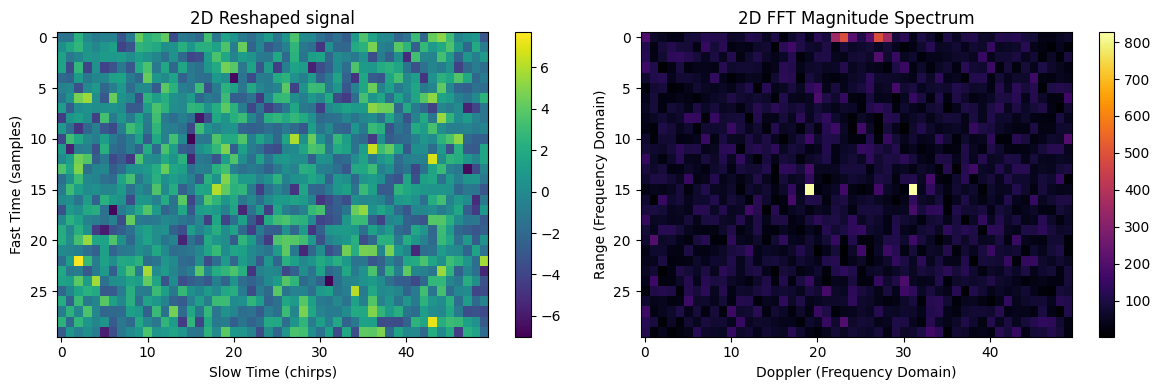

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(x_2d, aspect='auto', cmap='viridis')
plt.title("2D Reshaped signal")
plt.xlabel("Slow Time (chirps)")
plt.ylabel("Fast Time (samples)")
plt.colorbar()

# Plot 2D FFT magnitude
plt.subplot(1, 2, 2)
plt.imshow(Y_shifted, aspect='auto', cmap='inferno')
plt.title('2D FFT Magnitude Spectrum')
plt.xlabel('Doppler (Frequency Domain)')
plt.ylabel('Range (Frequency Domain)')
plt.colorbar()
plt.tight_layout()
plt.show()